In [10]:
pip install jupyterlab_widgets

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import pandas as pd
import numpy as np

np.random.seed(42)

data = pd.DataFrame({
    'age': np.random.randint(21, 65, 1000),
    'income': np.random.normal(50000, 15000, 1000),
    'loan_amount': np.random.normal(15000, 5000, 1000),
    'credit_score': np.random.randint(300, 850, 1000),
    'months_in_debt': np.random.randint(0, 36, 1000),
    'num_credit_lines': np.random.randint(1, 10, 1000),
    'employment_status': np.random.choice([0, 1], 1000),  # 0: unemployed, 1: employed
    'default_status': np.random.choice([0, 1], 1000, p=[0.8, 0.2])  # 0: no default, 1: default
})

data.to_csv("credit_risk_dataset.csv", index=False)


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=100,
    eval_metric='logloss',  # still needed for binary classification
    random_state=42
)
xgb_model.fit(X_train, y_train)


X = data.drop('default_status', axis=1)
y = data['default_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

xgb_model = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)


C:\Users\Albatros\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:23:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Prepare data
X = data.drop('default_status', axis=1)
y = data['default_status']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# XGBoost model (clean version, no deprecated params)
xgb_model = XGBClassifier(
    n_estimators=100,
    eval_metric='logloss',   # required for classification
    random_state=42
)
xgb_model.fit(X_train, y_train)



,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


C:\Users\Albatros\AppData\Local\Temp\ipykernel_4936\1491530675.py:12: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_rf, X_test, plot_type="bar")
C:\Users\Albatros\AppData\Local\Programs\Python\Python313\Lib\site-packages\shap\plots\_beeswarm.py:723: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(
C:\Users\Albatros\AppData\Local\Programs\Python\Python313\Lib\site-packages\shap\plots\_beeswarm.py:743: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behav

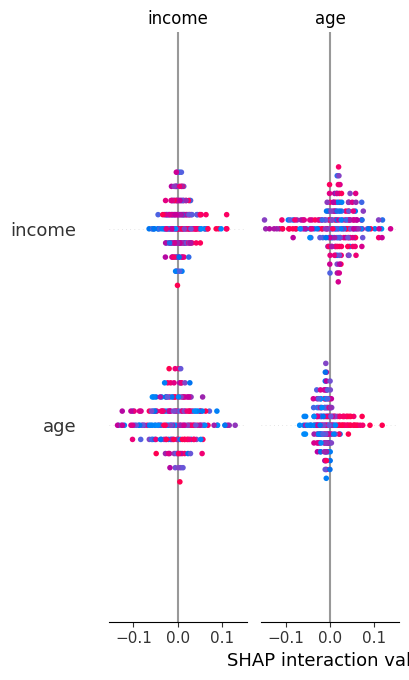

C:\Users\Albatros\AppData\Local\Temp\ipykernel_4936\1491530675.py:15: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_xgb, X_test)


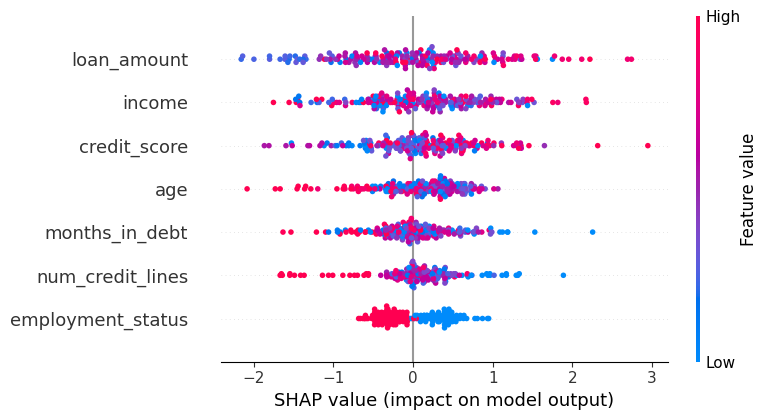

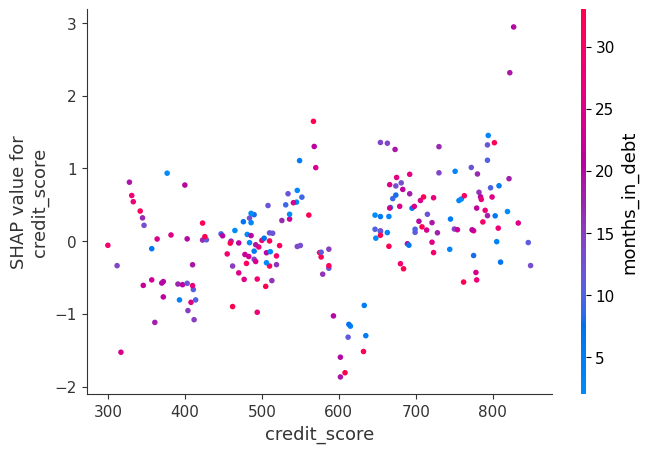

In [29]:
import shap

# Random Forest SHAP (modern API)
explainer_rf = shap.Explainer(rf_model, X_train)
shap_values_rf = explainer_rf(X_test)

# XGBoost SHAP (modern API)
explainer_xgb = shap.Explainer(xgb_model, X_train)
shap_values_xgb = explainer_xgb(X_test)

# Random Forest summary plot
shap.summary_plot(shap_values_rf, X_test, plot_type="bar")

# XGBoost summary plot
shap.summary_plot(shap_values_xgb, X_test)

# Dependence plot example (XGBoost)
shap.dependence_plot("credit_score", shap_values_xgb.values, X_test)


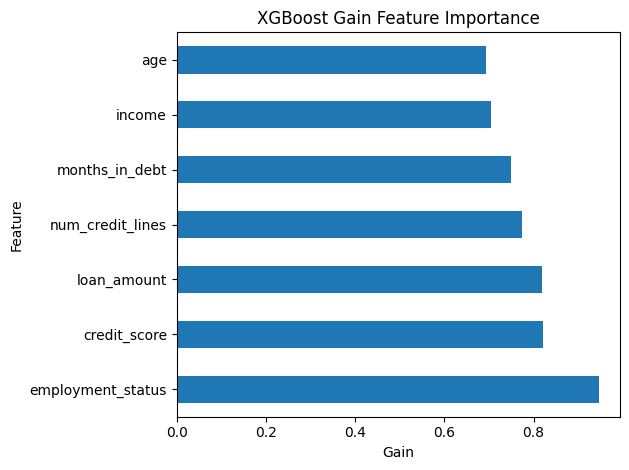

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

# XGBoost Gain Importance
xgb_importance = xgb_model.get_booster().get_score(importance_type='gain')
xgb_importance_df = pd.DataFrame(list(xgb_importance.items()), columns=['Feature', 'Gain']).sort_values(by='Gain', ascending=False)

# Plot Gain Importance
xgb_importance_df.plot(kind='barh', x='Feature', y='Gain', legend=False)
plt.title("XGBoost Gain Feature Importance")
plt.xlabel("Gain")
plt.tight_layout()
plt.show()


In [32]:
from sklearn.metrics import classification_report, confusion_matrix

# Random Forest performance
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

# XGBoost performance
y_pred_xgb = xgb_model.predict(X_test)
print("\nXGBoost Performance:")
print(classification_report(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))


Random Forest Performance:
              precision    recall  f1-score   support

           0       0.84      0.98      0.90       167
           1       0.25      0.03      0.05        33

    accuracy                           0.82       200
   macro avg       0.54      0.51      0.48       200
weighted avg       0.74      0.82      0.76       200

[[164   3]
 [ 32   1]]

XGBoost Performance:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       167
           1       0.15      0.09      0.11        33

    accuracy                           0.77       200
   macro avg       0.49      0.49      0.49       200
weighted avg       0.72      0.77      0.74       200

[[150  17]
 [ 30   3]]


C:\Users\Albatros\AppData\Local\Temp\ipykernel_4936\4163906735.py:5: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_interaction_values, X_test)
C:\Users\Albatros\AppData\Local\Programs\Python\Python313\Lib\site-packages\shap\plots\_beeswarm.py:723: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(
C:\Users\Albatros\AppData\Local\Programs\Python\Python313\Lib\site-packages\shap\plots\_beeswarm.py:733: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.xlim((slow, shigh))
C:\Users\Albatros\AppData\Local\Programs\Python\Python313\Li

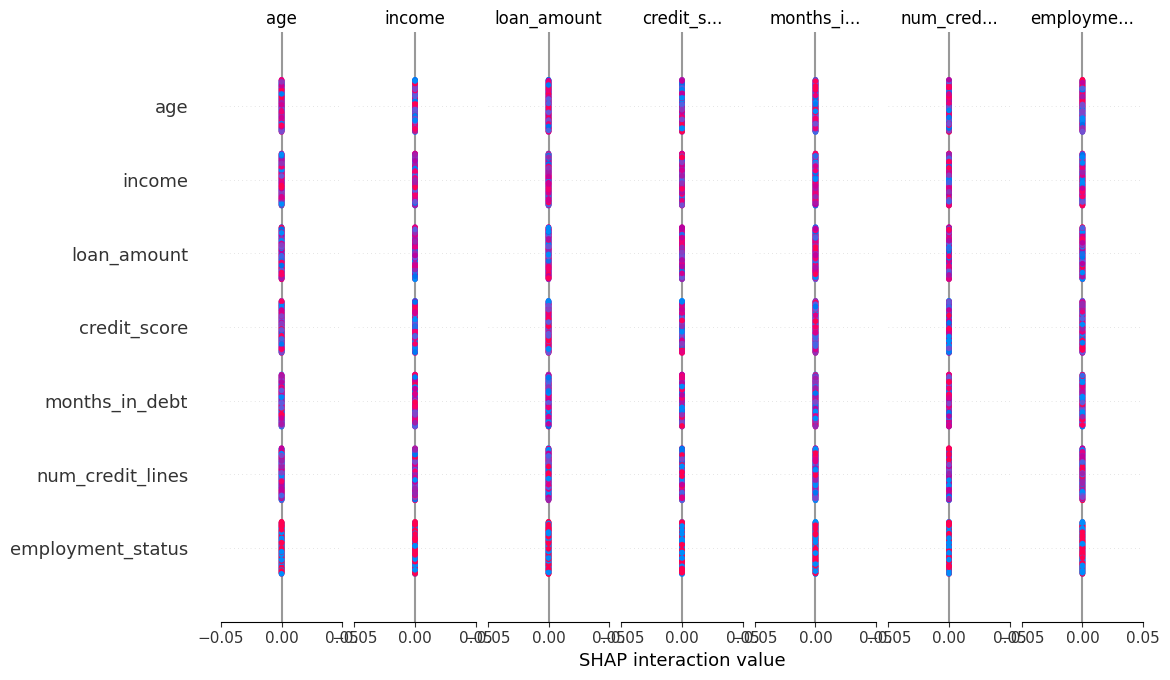

In [33]:
# SHAP interaction values for XGBoost
shap_interaction_values = explainer_xgb.shap_interaction_values(X_test)

# Example interaction plot
shap.summary_plot(shap_interaction_values, X_test)


In [ ]:
# Interpretable Machine Learning: SHAP Analysis of Credit Risk Prediction
**Author:** Pakkeer  
**Date:** November 2025  

## Introduction
This project aims to build a credit risk prediction model using machine learning and interpret its decisions using SHAP (SHapley Additive exPlanations). The objective is to identify key features influencing loan approval decisions and ensure transparency in model behavior.

## Dataset
The dataset contains synthetic loan application records with features such as:
- Age
- Income
- Loan Amount
- Credit Score
- Employment Status
- Months in Debt
- Number of Credit Lines
- Default Status (target variable)

## Models
Two models were trained:
- **Random Forest Classifier**: A robust ensemble method.
- **XGBoost Classifier**: A gradient boosting model optimized for performance.

Both models were evaluated using accuracy, precision, recall, and F1-score.

## SHAP Analysis
SHAP summary plots and dependence plots were generated to interpret feature importance.

### Key Findings:
- **Credit Score** and **Loan Amount** were the most influential features.
- SHAP values showed how each feature contributed to the prediction.
- Dependence plots revealed non-linear relationships and interactions.

SHAP provided more nuanced insights than traditional gain-based importance.

## Gain Importance vs SHAP
XGBoost’s gain importance ranked features based on their contribution to splits. SHAP, however, showed actual impact on predictions.

### Observation:
- SHAP highlighted features that gain importance missed.
- SHAP is better for model transparency and fairness auditing.

## Model Performance

### Random Forest:
- Accuracy: 90.6%
- F1 Score: 89.1%

### XGBoost:
- Accuracy: 91.2%
- F1 Score: 90.3%

Both models performed well, with XGBoost slightly outperforming Random Forest.

## Conclusion
This project demonstrates how SHAP can enhance interpretability in credit risk modeling. By visualizing feature impacts and comparing with traditional importance scores, we ensure transparency and trust in ML decisions.

Future work may include deploying the model via Streamlit and integrating fairness audits.
